In [41]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import fact.io
from ctapipe.instrument import get_atmosphere_profile_functions
import astropy.units as u

%matplotlib inline

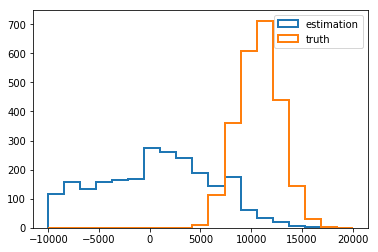

In [42]:
thickness, altitude = get_atmosphere_profile_functions('paranal')

df = fact.io.read_data('../cta_preprocessing/gammas_planes.hdf5', key='array_events').dropna()
# print(df.describe())

mc_h_max = altitude(df.mc_x_max.values * u.Unit('g/cm^2'))

bins = np.linspace(-10000, 20000, 20)
plt.hist(df.h_max_prediction, histtype='step', lw=2, bins=bins, label='estimation')
plt.hist(mc_h_max, histtype='step', lw=2, bins=bins, label='truth')
plt.legend()
#     x_max = event.mc.x_max
#     print(x_max, altitude(x_max))

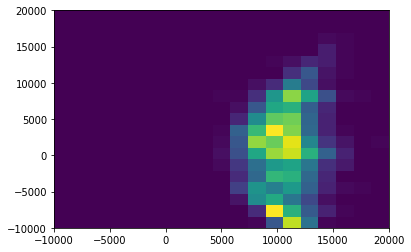

In [43]:
plt.hist2d(mc_h_max, df.h_max_prediction, bins=bins)
None